In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
from os.path import join as pjoin
from scipy.stats.stats import sem
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir, get_rois
from magicbox.algorithm.array import summary_across_col_by_mask
from magicbox.algorithm.plot import prepare_y_bar_line, plot_bar, plot_line

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/line_bar')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# ROI Scalar

## 画多个ROI随年龄的变化曲线

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21]


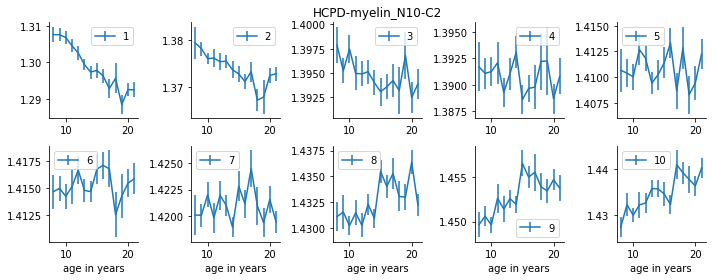

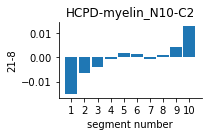

In [19]:
# set parameters
age_mask = 'remove567'
src_file = pjoin(anal_dir, 'ROI_scalar/HCPD-myelin_N10-C2.csv')
rois = [str(i) for i in np.arange(1, 11)]
arrange_flag = None  # OP-gdist, M+T-PC1
info_file = pjoin(proj_dir, 'data/HCP/HCPD_SubjInfo.csv')
age_name = 'age in years'
# n_row, n_col = 5, 9
# figsize = (18, 10)
# n_row, n_col = 1, 3
# figsize = (6, 2)
n_row, n_col = 2, 5
figsize = (10, 4)
ylim = None
title = 'HCPD-myelin_N10-C2'
mode1 = pjoin(work_dir, f'{title}-1.jpg')
mode2 = pjoin(work_dir, f'{title}-2.jpg')
# mode1 = 'show'
# mode2 = 'show'

# arrange ROIs
if arrange_flag is None:
    pass
elif arrange_flag == 'OP-gdist':
    # 依据各ROI离枕极的距离从小到大排序
    df_tmp = pd.read_csv(pjoin(
        anal_dir, 'ROI_scalar/gdist_src-OccipitalPole_HCP-MMP.csv'
    ))
    arrange_values = df_tmp.loc[0, rois]
    sort_indices = np.argsort(arrange_values)
    rois = [rois[i] for i in sort_indices]
elif arrange_flag == 'M+T-PC1':
    # 依据各ROI在HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj PC1中的均值从小到大排序
    df_tmp = pd.read_csv(pjoin(
        anal_dir, 'ROI_scalar/HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_HCP-MMP.csv'
    ), index_col=0)
    arrange_values = df_tmp.loc['C1', rois]
    sort_indices = np.argsort(arrange_values)
    rois = [rois[i] for i in sort_indices]
else:
    raise ValueError

# calculating
src_df = pd.read_csv(src_file)
src_data = np.array(src_df.loc[:, rois]).T
ages = np.array(pd.read_csv(info_file)[age_name])
ages_uniq = np.unique(ages)
if age_mask is None:
    pass
elif age_mask == 'remove567':
    # 舍弃5, 6, 7岁的被试
    print(ages_uniq)
    ages_uniq = ages_uniq[3:]
    print(ages_uniq)
else:
    raise ValueError
y_dict, yerr_dict = summary_across_col_by_mask(
    src_data, ages, ages_uniq, ['mean', 'sem'], row_names=rois, out_dict=True
)
key_groups = [(i,) for i in rois]
plot_line(
    y=prepare_y_bar_line(y_dict, key_groups), n_row=n_row, n_col=n_col, x=[ages_uniq]*len(rois),
    figsize=figsize, yerr=prepare_y_bar_line(yerr_dict, key_groups),
    label=key_groups, xlabel=age_name, ylim=ylim, title=title, mode=mode1
)

y2 = np.zeros(len(rois), np.float64)
for roi_idx, roi in enumerate(rois):
    y2[roi_idx] = y_dict[roi][-1] - y_dict[roi][0]
plot_bar(y2, figsize=(3, 2), show_height=None, xlabel='segment number',
         xticklabel=tuple(rois), ylabel='21-8', title=title, mode=mode2)

## 把多个ROI的发育趋势画到同一个ax里

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21]


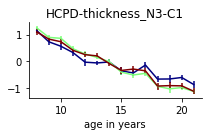

In [14]:
# set parameters
age_mask = 'remove567'
fname = 'HCPD-thickness_N3-C1'
src_file = pjoin(anal_dir, f'ROI_scalar/{fname}.csv')
rois = [str(i) for i in np.arange(1, 4)]
cmap = plt.cm.jet
color_indices = np.linspace(0, 1, 3)
colors = tuple(cmap(color_indices[i]) for i in range(3))
labels = None
info_file = pjoin(proj_dir, 'data/HCP/HCPD_SubjInfo.csv')
age_name = 'age in years'
n_row, n_col = 1, 1
figsize = (3, 2)
zscore_flag = True
mode = pjoin(work_dir, f'{fname}.jpg')
# mode = 'show'

# calculating
src_df = pd.read_csv(src_file)
src_data = np.array(src_df.loc[:, rois]).T
ages = np.array(pd.read_csv(info_file)[age_name])
ages_uniq = np.unique(ages)
if age_mask is None:
    pass
elif age_mask == 'remove567':
    # 舍弃5, 6, 7岁的被试
    print(ages_uniq)
    ages_uniq = ages_uniq[3:]
    print(ages_uniq)
else:
    raise ValueError
y_dict, yerr_dict = summary_across_col_by_mask(
    src_data, ages, ages_uniq, ['mean', 'sem'], row_names=rois,
    zscore_flag=zscore_flag, out_dict=True)
key_groups = [rois]
plot_line(
    y=prepare_y_bar_line(y_dict, key_groups), n_row=n_row, n_col=n_col, x=ages_uniq,
    figsize=figsize, yerr=prepare_y_bar_line(yerr_dict, key_groups),
    label=labels, xlabel=age_name, title=fname, mode=mode, color=colors
)

## 把ROI分组，同一组的画到同一个ax里

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21]


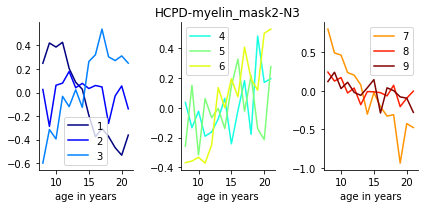

In [11]:
# set parameters
age_mask = 'remove567'
fname = 'HCPD-myelin_mask2-N3'
src_file = pjoin(anal_dir, f'ROI_scalar/{fname}.csv')
rois = [str(i) for i in np.arange(1, 10)]
cmap = plt.cm.jet
color_indices = np.linspace(0, 1, 9)
colors = [
    tuple(cmap(color_indices[i]) for i in range(3)),
    tuple(cmap(color_indices[i]) for i in range(3, 6)),
    tuple(cmap(color_indices[i]) for i in range(6, 9))]
labels = [tuple(rois[:3]), tuple(rois[3:6]), tuple(rois[6:])]
info_file = pjoin(proj_dir, 'data/HCP/HCPD_SubjInfo.csv')
age_name = 'age in years'
n_row, n_col = 1, 3
n_ax = 3
figsize = (6, 3)
zscore_flag = True
show_yerr = False
mode = pjoin(work_dir, f'{fname}.jpg')
# mode = 'show'

# calculating
src_df = pd.read_csv(src_file)
src_data = np.array(src_df.loc[:, rois]).T
ages = np.array(pd.read_csv(info_file)[age_name])
ages_uniq = np.unique(ages)
if age_mask is None:
    pass
elif age_mask == 'remove567':
    # 舍弃5, 6, 7岁的被试
    print(ages_uniq)
    ages_uniq = ages_uniq[3:]
    print(ages_uniq)
else:
    raise ValueError
y_dict, yerr_dict = summary_across_col_by_mask(
    src_data, ages, ages_uniq, ['mean', 'sem'], row_names=rois,
    zscore_flag=zscore_flag, out_dict=True)
key_groups = labels
if show_yerr:
    yerr = prepare_y_bar_line(yerr_dict, key_groups)
else:
    yerr=None
plot_line(
    y=prepare_y_bar_line(y_dict, key_groups), n_row=n_row, n_col=n_col, x=[ages_uniq] * n_ax,
    figsize=figsize, yerr=yerr, label=labels, xlabel=age_name, title=fname, mode=mode, color=colors
)

# Plot Age Distribution

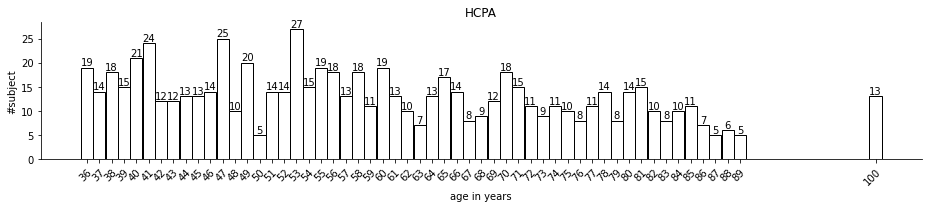

In [9]:
dataset_name = 'HCPA'
# figsize = (6, 3)
figsize = (13, 3)
age_name = 'age in years'
fpath = pjoin(proj_dir, f'data/HCP/{dataset_name}_SubjInfo.csv')
out_file = pjoin(work_dir, f'{dataset_name}_age_dist.jpg')
# out_file = 'show'

df = pd.read_csv(fpath)
ages = np.array(df[age_name])
ages_uniq = np.unique(ages)

y = np.zeros_like(ages_uniq, int)
for idx, age in enumerate(ages_uniq):
    y[idx] = np.sum(ages == age)

plot_bar(y, figsize=figsize, x=ages_uniq, fc_ec_flag=True,
         fc=('w',), ec=('k',), show_height='', xlabel=age_name,
         xticklabel=ages_uniq, rotate_xticklabel=True,
         ylabel='#subject', title=dataset_name, mode=out_file)

# Plot Cluster

## 把detect_community1得到的各map的modularity用bar图展示

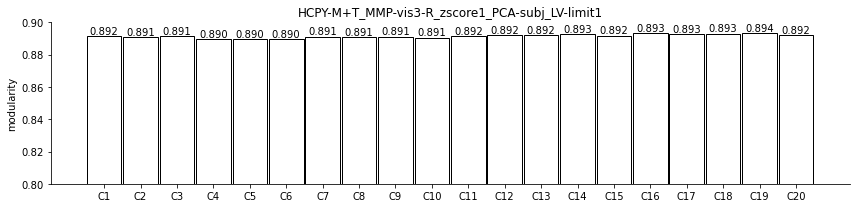

In [3]:
fname = 'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_LV-limit1'
df = pd.read_csv(pjoin(anal_dir, f'cluster/{fname}.csv'))
plot_bar(np.array(df['modularity']), figsize=(12, 3) ,fc_ec_flag=True, fc=('w',), ec=('k',),
         show_height='.3f', xticklabel=tuple(df['name']), ylabel='modularity', ylim=(0.8, 0.9),
         title=fname, mode=pjoin(work_dir, 'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_LV-limit1.jpg'))

# Plot Decomposition

## 可视化PCA各成分的解释方差

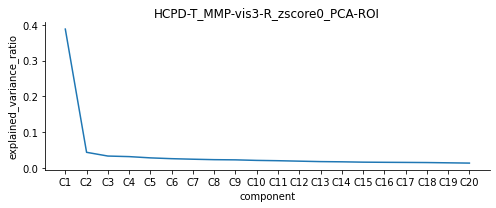

In [11]:
# settings
fname = 'HCPD-T_MMP-vis3-R_zscore0_PCA-ROI'
components = 'all'
out_file = pjoin(work_dir, f'{fname}.jpg')
# out_file = 'show'

# start
data = pkl.load(open(pjoin(anal_dir, f'decomposition/{fname}.pkl'), 'rb'))
if components == 'all':
    components = np.arange(data.n_components) + 1
else:
    components = np.array(components)
plot_line(
    y=data.explained_variance_ratio_[components - 1], n_row=1, n_col=1, figsize=(7, 3),
    yerr=None, x=None, label=None, color=None, mode=out_file, xlabel='component',
    xtick=None, xticklabel=tuple(f'C{i}' for i in components), rotate_xticklabel=False,
    ylabel='explained_variance_ratio', ylim=None, title=fname
)

## 把多个模态同一个成分的权重时间序列画到只有单个ax的fig里（线图）

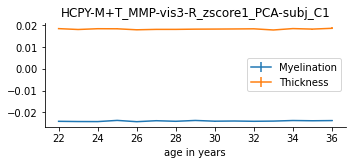

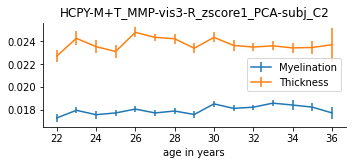

In [10]:
# settings
zscore_flag = False
fnames = [
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_M.csv',
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_T.csv'
]
labels = ('Myelination', 'Thickness')
cols = ['C1', 'C2']
key_groups_list = [[['0-C1', '1-C1']], [['0-C2', '1-C2']]]
titles = [
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_C1',
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_C2'
]
out_files = [
    pjoin(work_dir, 'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_C1.jpg'),
    pjoin(work_dir, 'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_C2.jpg')
]
# out_files = ['show', 'show']

age_name = 'age in years'
ages = pd.read_csv(dataset_name2info['HCPY'])[age_name]
ages_uniq = np.unique(ages).tolist()
ages_uniq.remove(37)
ages_uniq = np.array(ages_uniq)

# start
data = []
row_names = []
for f_idx, fname in enumerate(fnames):
    df = pd.read_csv(pjoin(anal_dir, f'decomposition/{fname}'))
    data.append(np.array(df[cols]).T)
    row_names.extend([f'{f_idx}-{col}' for col in cols])
data = np.concatenate(data, 0)
y_dict, yerr_dict = summary_across_col_by_mask(
    data=data, mask=ages, values=ages_uniq, metrics=['mean', 'sem'],
    tol_size=10, nan_mode=False, row_names=row_names, zscore_flag=zscore_flag, out_dict=True
)
for i, key_groups in enumerate(key_groups_list):
    y = prepare_y_bar_line(y_dict, key_groups)
    yerr = prepare_y_bar_line(yerr_dict, key_groups)
    plot_line(y, n_row=1, n_col=1, figsize=(5, 2.4), yerr=yerr, x=ages_uniq,
              label=labels, color=None, mode=out_files[i], xlabel=age_name, xtick=None,
              xticklabel=None, rotate_xticklabel=False, ylabel=None, ylim=None, title=titles[i])

## 把多个成分多个模态的权重平均大小画到只有单个ax的fig里（bar图）

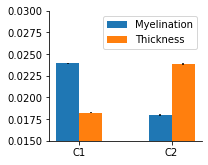

In [10]:
# settings
fnames = [
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_M.csv',
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_T.csv'
]
meas = ('Myelination', 'Thickness')
cols = ('C1', 'C2')
ylim = (0.015, 0.03)
# ylim = None
# out_file = pjoin(work_dir, 'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj.jpg')
out_file = 'show'

# start
n_fname = len(fnames)
n_col = len(cols)
y = np.zeros((n_fname, n_col), np.float64)
yerr = np.zeros((n_fname, n_col), np.float64)
for f_idx, fname in enumerate(fnames):
    df = pd.read_csv(pjoin(anal_dir, f'decomposition/{fname}'))
    for col_idx, col in enumerate(cols):
        samples = np.array(df[col])
        samples = np.abs(samples[~np.isnan(samples)])
        y[f_idx, col_idx] = np.mean(samples)
        yerr[f_idx, col_idx] = sem(samples)
plot_bar(
    y, n_row=1, n_col=1, figsize=(3, 2.4), yerr=yerr, x=None, width=None,
    label=meas, color=None, show_height=None, mode=out_file, xlabel=None,
    xticklabel=cols, rotate_xticklabel=False, ylabel=None, ylim=ylim, title=None
)

## 把多个成分多个模态的权重占比画到只有单个ax的fig里（bar图）

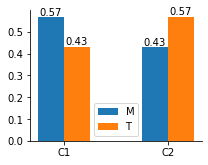

In [13]:
# settings
fnames = [
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_M.csv',
    'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj_T.csv'
]
# meas = ('Myelination', 'Thickness')
meas = ('M', 'T')
cols = ('C1', 'C2')
out_file = pjoin(work_dir, 'HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj.jpg')
# out_file = 'show'

# start
n_fname = len(fnames)
n_col = len(cols)
y = np.zeros((n_fname, n_col), np.float64)
for f_idx, fname in enumerate(fnames):
    df = pd.read_csv(pjoin(anal_dir, f'decomposition/{fname}'))
    for col_idx, col in enumerate(cols):
        samples = np.array(df[col])
        samples = np.abs(samples[~np.isnan(samples)])
        y[f_idx, col_idx] = np.sum(samples)
y /= np.sum(y, 0, keepdims=True)
plot_bar(
    y, figsize=(3, 2.4), label=meas, mode=out_file, show_height='.2f',
    xticklabel=cols, ylabel=None)

## 把单个文件中的不同column画到不同ax里

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


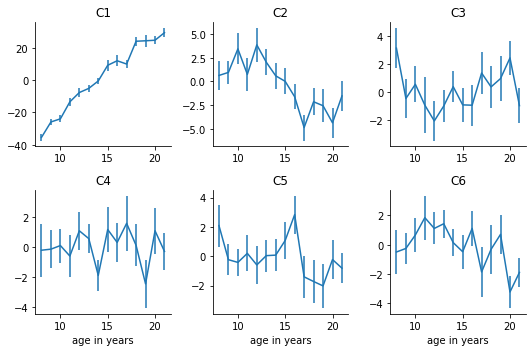

In [13]:
# settings
fname = 'HCPD-T_MMP-vis3-R_zscore0_PCA-vtx'
fpath = pjoin(anal_dir, f'decomposition/{fname}.csv')
cols = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
out_file = pjoin(work_dir, f'{fname}.jpg')
# out_file = 'show'

age_name = 'age in years'
ages = pd.read_csv(pjoin(proj_dir, 'data/HCP/HCPD_SubjInfo.csv'))[age_name]
ages_uniq = np.unique(ages).tolist()
print(ages_uniq)
for age in [5, 6, 7]:
    ages_uniq.remove(age)
print(ages_uniq)
ages_uniq = np.array(ages_uniq)

# start
n_col = len(cols)
df = pd.read_csv(fpath)
data = np.array(df[cols]).T
y, yerr = summary_across_col_by_mask(
    data=data, mask=ages, values=ages_uniq, metrics=['mean', 'sem'],
    tol_size=10, nan_mode=False, row_names=None, zscore_flag=False, out_dict=False
)
key_groups = [[i] for i in range(n_col)]
y = prepare_y_bar_line(y, key_groups)
yerr = prepare_y_bar_line(yerr, key_groups)
plot_line(y, n_row=2, n_col=3, figsize=(7.5, 5), yerr=yerr, x=[ages_uniq]*n_col,
          label=None, color=None, mode=out_file, xlabel=age_name, xtick=None,
          xticklabel=None, rotate_xticklabel=False, ylabel=None, ylim=None, title=cols)

# Plot Fit

## HCPD-M+T=C1C2.csv

### 现有的column

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21]


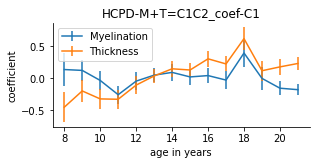

In [19]:
# load data
dataset_name = 'HCPD'
fname = f'{dataset_name}-M+T=C1C2'
df = pd.read_csv(pjoin(anal_dir, f'fit/{fname}.csv'))

# get age information
info_file = pjoin(proj_dir, f'data/HCP/{dataset_name}_SubjInfo.csv')
age_name = 'age in years'
ages = pd.read_csv(info_file)[age_name]
ages_uniq = np.unique(ages)
print(ages_uniq)
ages_uniq = ages_uniq[3:]
print(ages_uniq)

# prepare plot contents
cols = ['coef_C1_Myelination', 'coef_C1_Thickness']
labels = ('Myelination', 'Thickness')
ylabel='coefficient'
title = f'{fname}_coef-C1'

# cols = ['score_C1']
# labels = None
# ylabel='R2'
# title = f'{fname}_score-C1'

data = np.array(df[cols]).T
figsize = (4.5, 2.4)
zscore_flag = True
key_groups = [cols]

# get valid subjects
# outlier_vec1 = np.load(pjoin(anal_dir, f'outlier/{dataset_name}-myelin_MMP-vis3-R_RSM-IQR3.npy'))
# outlier_vec2 = np.load(pjoin(anal_dir, f'outlier/{dataset_name}-thickness_MMP-vis3-R_RSM-IQR3.npy'))
# non_outlier_vec = ~np.logical_or(outlier_vec1, outlier_vec2)
# data = data[:, non_outlier_vec]
# ages = ages[non_outlier_vec]
# ages_uniq = np.unique(ages)

# prepare out information
out_file = pjoin(work_dir, f'{title}.jpg')
# out_file = 'show'

# start
y_dict, yerr_dict = summary_across_col_by_mask(
    data=data, mask=ages, values=ages_uniq, metrics=['mean', 'sem'],
    nan_mode=False, row_names=cols, zscore_flag=zscore_flag, out_dict=True
)
plot_line(
    y=prepare_y_bar_line(y_dict, key_groups), figsize=figsize,
    yerr=prepare_y_bar_line(yerr_dict, key_groups), x=ages_uniq, label=labels,
    xlabel=age_name, title=title, mode=out_file, ylabel=ylabel
)


### (|M|-|T|)/(|M|+|T|)

Warning! The sample size of value-6 is 5.
Warning! The sample size of value-7 is 5.


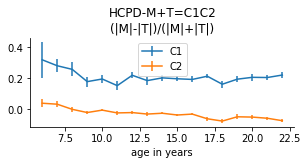

In [9]:
fname = 'HCPD-M+T=C1C2'
df = pd.read_csv(pjoin(anal_dir, f'fit/{fname}.csv'))

age_name = 'age in years'
ages = pd.read_csv(dataset_name2info['HCPD'])[age_name]
ages_uniq = np.unique(ages)

figsize = (4.5, 2.4)
labels = ('C1', 'C2')
data = np.zeros((len(labels), df.shape[0]), np.float64)
for lbl_idx, lbl in enumerate(labels):
    m = np.abs(df[f'coef_{lbl}_Myelination'])
    t = np.abs(df[f'coef_{lbl}_Thickness'])
    data[lbl_idx, :] =  (m - t) / (m + t)
title = f'{fname}\n(|M|-|T|)/(|M|+|T|)'
out_file = pjoin(work_dir, f'{fname}_MT-diff.jpg')
# out_file = 'show'

y, yerr = summary_across_col_by_mask(data, ages, ages_uniq, ['mean', 'sem'])
plot_line(
    y=y, figsize=figsize, yerr=yerr, x=ages_uniq,
    label=labels, xlabel=age_name, title=title, mode=out_file
)


### |M|-|T|

Warning! The sample size of value-6 is 4.
Warning! The sample size of value-7 is 5.


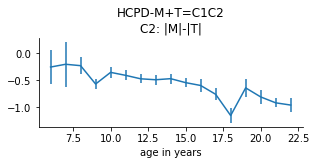

In [12]:
# load data
fname = 'HCPD-M+T=C1C2'
df = pd.read_csv(pjoin(anal_dir, f'fit/{fname}.csv'))

# get age information
age_name = 'age in years'
ages = pd.read_csv(dataset_name2info['HCPD'])[age_name]
ages_uniq = np.unique(ages)

# prepare plot contents
figsize = (4.5, 2.4)
lbl = 'C2'
data = np.zeros((1, df.shape[0]), np.float64)
m = np.abs(df[f'coef_{lbl}_Myelination'])
t = np.abs(df[f'coef_{lbl}_Thickness'])
data[0, :] =  m - t
title = f'{fname}\n{lbl}: |M|-|T|'
out_file = pjoin(work_dir, f'{fname}_MT-diff-{lbl}.jpg')
# out_file = 'show'

# get valid subjects
outlier_vec1 = np.load(pjoin(anal_dir, 'outlier/HCPD-myelin_MMP-vis3-R_RSM-IQR3.npy'))
outlier_vec2 = np.load(pjoin(anal_dir, 'outlier/HCPD-thickness_MMP-vis3-R_RSM-IQR3.npy'))
non_outlier_vec = ~np.logical_or(outlier_vec1, outlier_vec2)
data = data[:, non_outlier_vec]
ages = ages[non_outlier_vec]
ages_uniq = np.unique(ages)

y, yerr = summary_across_col_by_mask(data, ages, ages_uniq, ['mean', 'sem'])
plot_line(
    y=y, figsize=figsize, yerr=yerr, x=ages_uniq, xlabel=age_name,
    title=title, mode=out_file
)

## CalcS+OcPole+MT=C1.csv

score: 0.6942280684268545


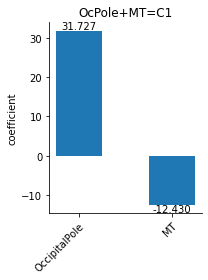

In [8]:
# fname = 'CalcS+OcPole+MT=C1'
# fname = 'CalcS+MT=C1'
fname = 'OcPole+MT=C1'
df = pd.read_csv(pjoin(anal_dir, f'fit/{fname}.csv'))
print('score:', df['score_C1'].item())
out_file = pjoin(work_dir, f'{fname}.jpg')
# out_file = 'show'

coef_names = [i for i in df.columns if i.startswith('coef_C1_')]
feat_names = tuple(i.split('_')[-1] for i in coef_names)
plot_bar(y=np.array(df.loc[0, coef_names]), figsize=(3, 4), show_height='.3f',
         xticklabel=feat_names, rotate_xticklabel=True, ylabel='coefficient',
         title=fname, mode=out_file)

## Mean8+Tau+Diff=C1C2.csv

score_C1: 0.9636226915861064


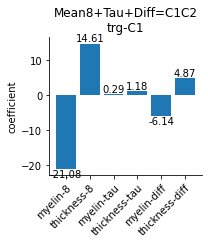

In [9]:
fname = 'Mean8+Tau+Diff=C1C2'
# fname = 'Mean8=C1C2'
pc_num = 'C1'
df = pd.read_csv(pjoin(anal_dir, f'fit/{fname}.csv'))
print(f'score_{pc_num}:', df[f'score_{pc_num}'].item())
out_file = pjoin(work_dir, f'{fname}_{pc_num}.jpg')
# out_file = 'show'

coef_names = [i for i in df.columns if i.startswith(f'coef_{pc_num}_')]
feat_names = tuple(i.split('_')[-1] for i in coef_names)
plot_bar(y=np.array(df.loc[0, coef_names]), figsize=(3, 3.5), show_height='.2f',
         xticklabel=feat_names, rotate_xticklabel=True, ylabel='coefficient',
         title=f'{fname}\ntrg-{pc_num}', mode=out_file)